# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def extract_info_by_label(review, label):
    label_element = review.find("td", text=label)
    if label_element:
        value_element = label_element.find_next("td")
        if value_element:
            return value_element.get_text(strip=True)
    return "N/A"

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 1000

reviews = []

user_prompts = ["Seat Type", "Type Of Traveller", "Date Flown", "Route", "Recommended"]

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    for review in parsed_content.find_all("article", {"itemprop": "review"}):

        # Extracting user-specified information
        info_dict = {'Text Review': review.find("div", {"class": "text_content"}).get_text(),
                     'Rating': review.find("div", {"class": "rating-10"}).get_text()}

        for prompt in user_prompts:
            info_dict[prompt] = extract_info_by_label(review, prompt)

        reviews.append(info_dict)

df = pd.DataFrame(reviews)

# Viewing first few rows to see what the dataset looks like
df.head(3)

Scraping page 1


<ipython-input-1-fece0569402e>:6: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  label_element = review.find("td", text=label)


Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10


,Text Review,Rating,Seat Type,Type Of Traveller,Date Flown,Route,Recommended
0,"✅ Trip Verified | Disappointing service, pla...",\n3/10\n,Economy Class,Solo Leisure,October 2024,Keflavik to Cape Town via London,no
1,✅ Trip Verified | A transit visa is required...,\n1/10\n,Economy Class,Couple Leisure,October 2024,Singapore to Keflavik via London,no
2,✅ Trip Verified | I was surprised to receive...,\n3/10\n,Economy Class,Solo Leisure,October 2024,Las Palmas to London Gatwick,no


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

Although, the idea is to carryout an analysis on reviews. Nevertheless, I reckon that adding some extra features to the dataset will aid in the analysis and may likely project trends or patterns that could be embedded in the dataset. So the extra features scraped are, user ratings on a scale of 10, Seat Type travelled on, Type of traveller, Date of purposed flight, Flight itinery and if they (user) would recommend British Airways.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Text Review        3890 non-null   object
 1   Rating             3890 non-null   object
 2   Seat Type          3890 non-null   object
 3   Type Of Traveller  3890 non-null   object
 4   Date Flown         3890 non-null   object
 5   Route              3890 non-null   object
 6   Recommended        3890 non-null   object
dtypes: object(7)
memory usage: 212.9+ KB


Notice how disorganized the dataset is. So to derive better insight from this, I would need to carry out some data cleaning using the following techniques

In [3]:
# Extracting only the rated value
df["Rating"] = df["Rating"].str.split("/", expand=True)[0]
df["Rating"] = df["Rating"].str[-1]
# Splitting the Date flown into new columns, month and year of flight
df[["Month", "Year"]] = df["Date Flown"].str.split(" ", expand=True)
# Similar to the date flown column, the Route split into Arrival and Departure columns
df["Departure"] = df["Route"].str.split(" to ", expand=True)[0]
df["Arrival"] = df["Route"].str.split(" to ", expand=True)[1]
# Dropping unuseful columns to avoid redundancy
df.drop(columns = ["Date Flown", "Route"], inplace = True)
df.head(5)

,Text Review,Rating,Seat Type,Type Of Traveller,Recommended,Month,Year,Departure,Arrival
0,"✅ Trip Verified | Disappointing service, pla...",3,Economy Class,Solo Leisure,no,October,2024,Keflavik,Cape Town via London
1,✅ Trip Verified | A transit visa is required...,1,Economy Class,Couple Leisure,no,October,2024,Singapore,Keflavik via London
2,✅ Trip Verified | I was surprised to receive...,3,Economy Class,Solo Leisure,no,October,2024,Las Palmas,London Gatwick
3,"✅ Trip Verified | Flight cancelled, not refu...",1,Economy Class,Family Leisure,no,August,2024,Gatwick,Florence
4,"✅ Trip Verified | I had visa issues, and hen...",1,Premium Economy,Solo Leisure,no,November,2024,Mumbai,London


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Text Review        3890 non-null   object
 1   Rating             3890 non-null   object
 2   Seat Type          3890 non-null   object
 3   Type Of Traveller  3890 non-null   object
 4   Recommended        3890 non-null   object
 5   Month              3890 non-null   object
 6   Year               3112 non-null   object
 7   Departure          3890 non-null   object
 8   Arrival            3099 non-null   object
dtypes: object(9)
memory usage: 273.6+ KB


In [5]:
# The following step looks to fill up missing values in the arrival column based on the most occurring value within the year and seat type in view
df['Arrival'] = df.groupby(['Year','Seat Type'])['Arrival'].transform(lambda x: x.fillna(x.mode().iloc[0]
                                                                                  if not x.isnull().all() else pd.NA))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Text Review        3890 non-null   object
 1   Rating             3890 non-null   object
 2   Seat Type          3890 non-null   object
 3   Type Of Traveller  3890 non-null   object
 4   Recommended        3890 non-null   object
 5   Month              3890 non-null   object
 6   Year               3112 non-null   object
 7   Departure          3890 non-null   object
 8   Arrival            3112 non-null   object
dtypes: object(9)
memory usage: 273.6+ KB


In [7]:
# filling up null rows
for column in ['Year', 'Arrival']:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Text Review        3890 non-null   object
 1   Rating             3890 non-null   object
 2   Seat Type          3890 non-null   object
 3   Type Of Traveller  3890 non-null   object
 4   Recommended        3890 non-null   object
 5   Month              3890 non-null   object
 6   Year               3890 non-null   object
 7   Departure          3890 non-null   object
 8   Arrival            3890 non-null   object
dtypes: object(9)
memory usage: 273.6+ KB


In [8]:
df.head(10)

,Text Review,Rating,Seat Type,Type Of Traveller,Recommended,Month,Year,Departure,Arrival
0,"✅ Trip Verified | Disappointing service, pla...",3,Economy Class,Solo Leisure,no,October,2024,Keflavik,Cape Town via London
1,✅ Trip Verified | A transit visa is required...,1,Economy Class,Couple Leisure,no,October,2024,Singapore,Keflavik via London
2,✅ Trip Verified | I was surprised to receive...,3,Economy Class,Solo Leisure,no,October,2024,Las Palmas,London Gatwick
3,"✅ Trip Verified | Flight cancelled, not refu...",1,Economy Class,Family Leisure,no,August,2024,Gatwick,Florence
4,"✅ Trip Verified | I had visa issues, and hen...",1,Premium Economy,Solo Leisure,no,November,2024,Mumbai,London
5,✅ Trip Verified | Singapore to Heathrow with...,6,Business Class,Family Leisure,yes,November,2024,Singapore,London
6,✅ Trip Verified | I recently travelled from ...,1,Economy Class,Couple Leisure,no,October,2024,Munich,London Heathrow
7,Not Verified | I paid for seats 80 A and B on...,3,Premium Economy,Couple Leisure,no,September,2024,Heathrow,Boston
8,"Not Verified | The flight wasn’t that bad, alt...",7,Economy Class,Family Leisure,yes,November,2024,Los Angeles,London Heathrow
9,✅ Trip Verified | I decided to treat myself a...,1,Premium Economy,Family Leisure,no,August,2024,Vancouver,London


In [9]:
# Taking out unnecessary text in the Text Review column such as the tick mark with Trip verified and not verified text.
df['Text Review'] = df['Text Review'].str.split('|').str[1].str.strip()

In [10]:
# converting and storing the values in the dataframe to a csv file
df.to_csv("BritishAirways_reviews.csv")

In [11]:
# Using summary statistics to have a glance at the distribution of the datase.
df.describe(include = 'all')

,Text Review,Rating,Seat Type,Type Of Traveller,Recommended,Month,Year,Departure,Arrival
count,2367,3890,3890,3890,3890,3890,3890,3890,3890
unique,2367,11,5,5,2,13,11,392,683
top,"Disappointing service, plane interior and terr...",1,Economy Class,Couple Leisure,no,N/A,2016,N/A,London
freq,1,938,2026,1055,2337,778,1341,776,1236


In [12]:
df = df[df['Text Review'].notnull()]
df.describe(include = 'all')

,Text Review,Rating,Seat Type,Type Of Traveller,Recommended,Month,Year,Departure,Arrival
count,2367,2367,2367,2367,2367,2367,2367,2367,2367
unique,2367,10,4,5,2,13,10,339,570
top,"Disappointing service, plane interior and terr...",1,Economy Class,Couple Leisure,no,March,2017,London,London
freq,1,729,1310,771,1616,223,560,514,414


Economy Class with 1310 goes to show that at least half of the reviews are from Economy class travellers. In similar vein,
one third of these reviewers travelled based on couple leisure. An astonishing number of 1616 choose not to
recommend BA for reasons that required further digging in order to explain this outrageous number. It is also important to notice that as at the time of this report, the most travelled month is March and 2017 appears to be the most travelled year.

In [13]:
# Looking at top 20 cities of departure
df['Departure'].value_counts().head(20)

,count
Departure,
London,514
London Heathrow,221
LHR,125
Gatwick,91
Heathrow,44
Johannesburg,31
Singapore,28
Los Angeles,28
London Gatwick,28


In [14]:
# Looking at top 20 cities of Destination
df['Arrival'].value_counts().head(20)

,count
Arrival,
London,414
London Heathrow,185
LHR,89
Gatwick,81
Heathrow,27
Cape Town,25
Johannesburg,23
London Gatwick,22
LGW,22


Sentiment analysis using Huggingface Transformer Model

In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [16]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [17]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [18]:
df['sentiment'] = df['Text Review'].apply(lambda x: sentiment_score(x[:512]))

In [19]:
df.head(10)

,Text Review,Rating,Seat Type,Type Of Traveller,Recommended,Month,Year,Departure,Arrival,sentiment
0,"Disappointing service, plane interior and terr...",3,Economy Class,Solo Leisure,no,October,2024,Keflavik,Cape Town via London,1
1,A transit visa is required for my partner to t...,1,Economy Class,Couple Leisure,no,October,2024,Singapore,Keflavik via London,1
2,I was surprised to receive confirmation pre-fl...,3,Economy Class,Solo Leisure,no,October,2024,Las Palmas,London Gatwick,2
3,"Flight cancelled, not refunding our money sayi...",1,Economy Class,Family Leisure,no,August,2024,Gatwick,Florence,1
4,"I had visa issues, and hence, was debarred fro...",1,Premium Economy,Solo Leisure,no,November,2024,Mumbai,London,2
5,Singapore to Heathrow with BA. Two choices on ...,6,Business Class,Family Leisure,yes,November,2024,Singapore,London,4
6,I recently travelled from Munich to London wit...,1,Economy Class,Couple Leisure,no,October,2024,Munich,London Heathrow,1
7,I paid for seats 80 A and B on my flight from ...,3,Premium Economy,Couple Leisure,no,September,2024,Heathrow,Boston,4
8,"The flight wasn’t that bad, although the Infli...",7,Economy Class,Family Leisure,yes,November,2024,Los Angeles,London Heathrow,3
9,I decided to treat myself and my teenage daugh...,1,Premium Economy,Family Leisure,no,August,2024,Vancouver,London,2


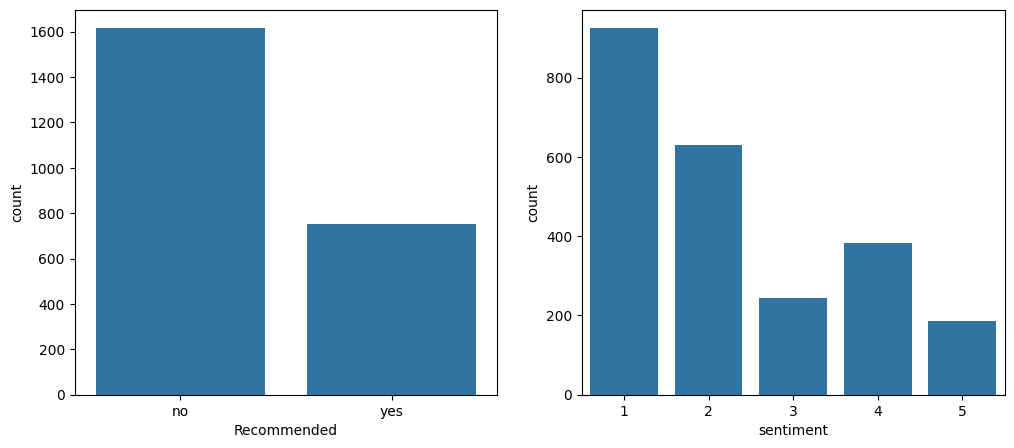

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2, figsize = (12,5))
sns.countplot(x='Recommended', data=df, ax =axs[0])
sns.countplot(x='sentiment', data=df)
plt.show()

In [22]:
pip install wordcloud

In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


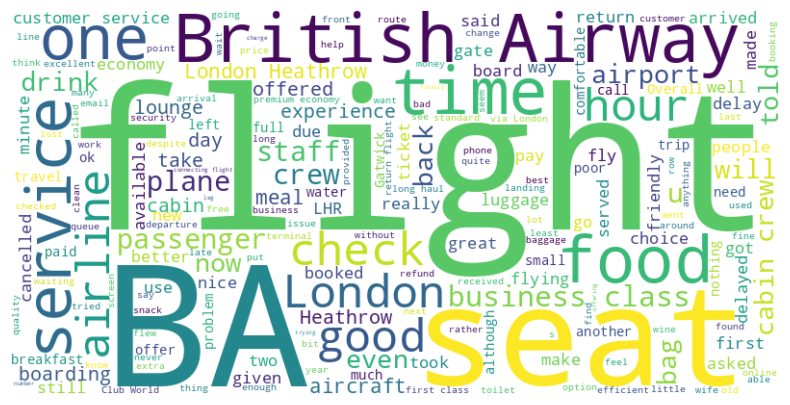

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word Cloud
all_text = ' '.join(df['Text Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Although the first graph shows that most reviews will likely not recommend the airline services, nevertheless the second graph depicts a different story. This could suggest that the sentiment analyzer failed at some point to approprately categorize the review.

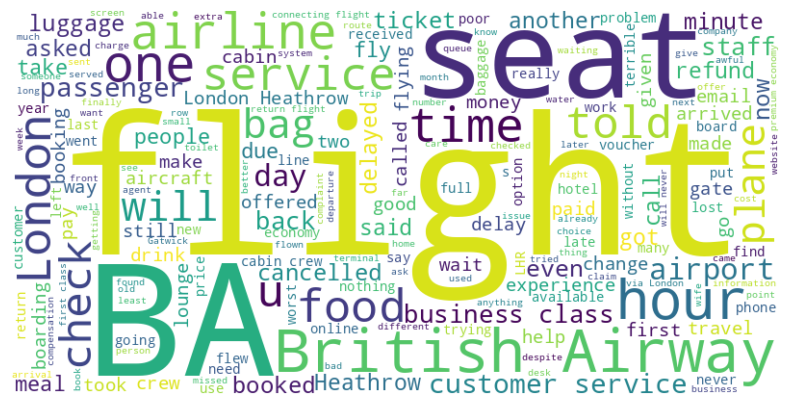

In [27]:
negative = df[df['sentiment'] == 1]

# Word Cloud
all_text = ' '.join(negative['Text Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

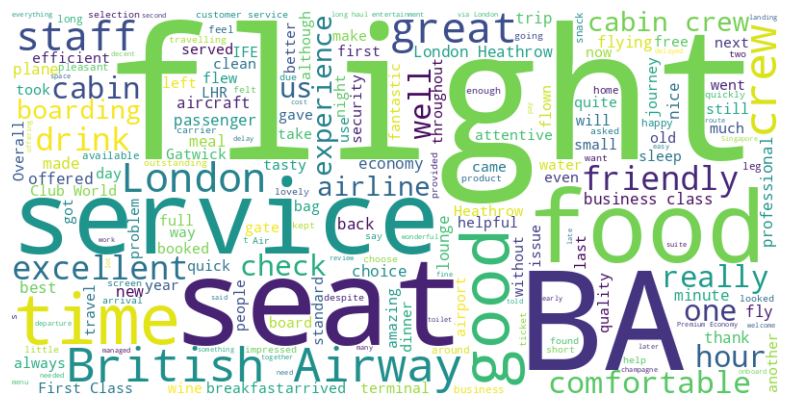

In [29]:
positive = df[df['sentiment'] == 5]

# Word Cloud
all_text = ' '.join(positive['Text Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Lets see the output of pronounced words of those that choose not to recommend

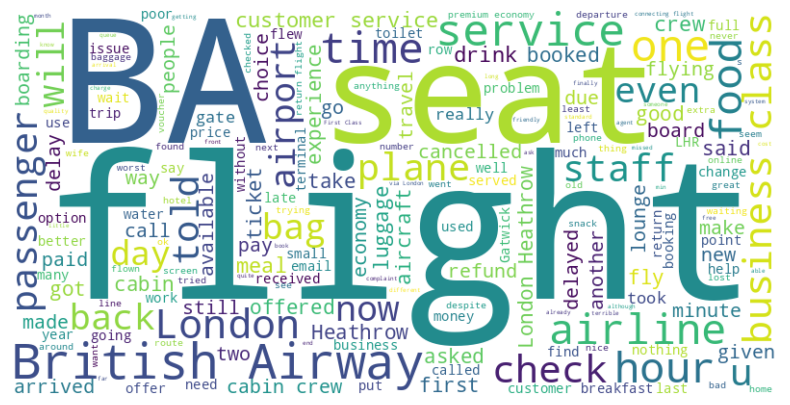

In [31]:
no_recommend = df[df['Recommended'] == 'no']

# Word Cloud
all_text = ' '.join(no_recommend['Text Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Lets see the output of pronounced words of those that choose to recommend

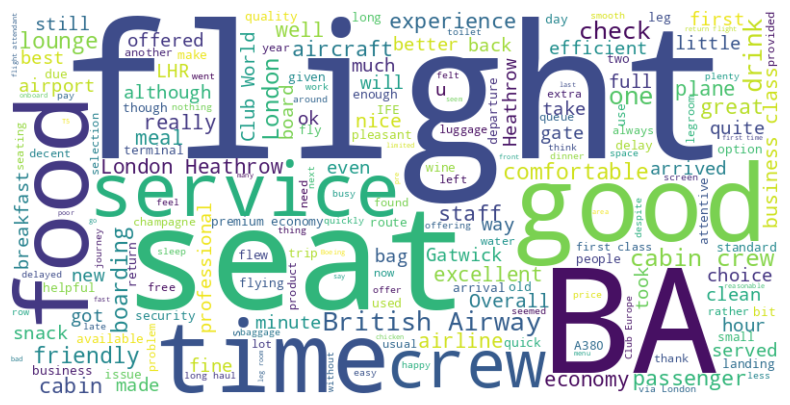

In [32]:
yes_recommend = df[df['Recommended'] == 'yes']

# Word Cloud
all_text = ' '.join(yes_recommend['Text Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

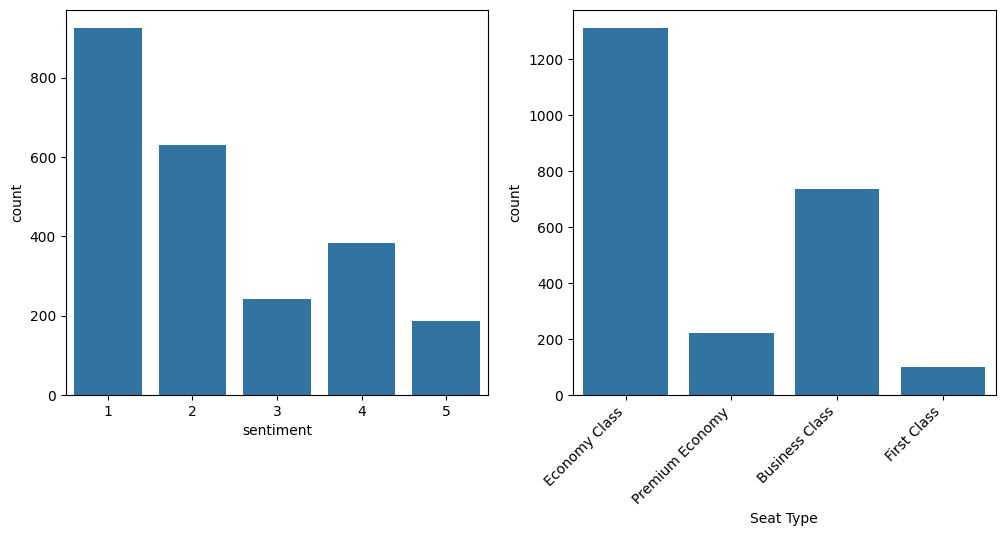

In [33]:
fig, axs = plt.subplots(1,2, figsize = (12,5))
sns.countplot(x='sentiment', data=df, ax=axs[0])
sns.countplot(x='Seat Type', data=df, ax=axs[1] )
plt.xticks(rotation=45, ha='right');

The graph above shows that Economy class are the dominant reviewers followed by Business class

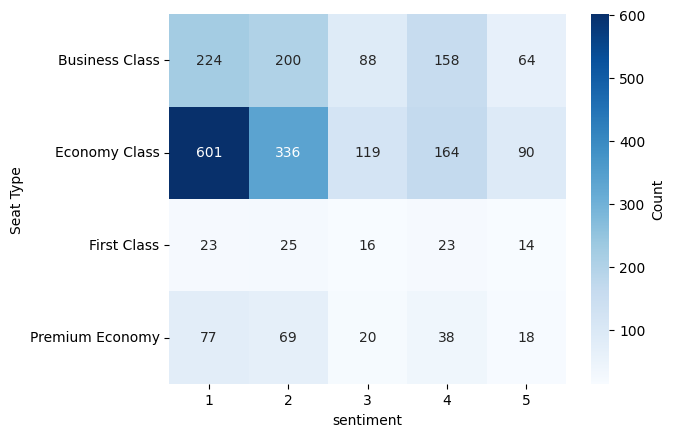

In [34]:
df_cross_seat_cat = pd.crosstab(df['Seat Type'], df['sentiment'])
sns.heatmap(df_cross_seat_cat, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Count'});

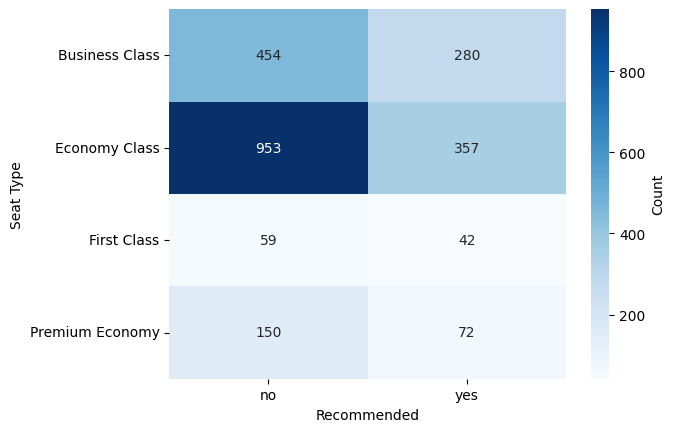

In [35]:
df_cross_recommend = pd.crosstab(df['Seat Type'], df['Recommended'])
sns.heatmap(df_cross_recommend, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Count'});

The interesting discovery at this point is the variance in opinion of service as the classes upgrade. The economy class show more dissatisfaction than all the other users such that nearly  two third or 70% choose not to recommend

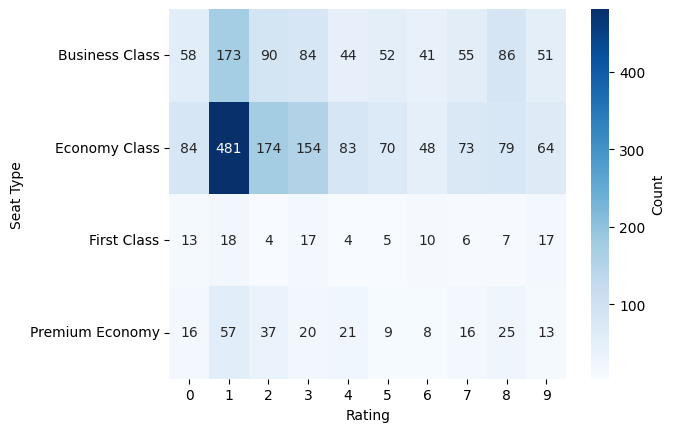

In [36]:
df_cross_seat_rat = pd.crosstab(df['Seat Type'], df['Rating'])
sns.heatmap(df_cross_seat_rat, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Count'});

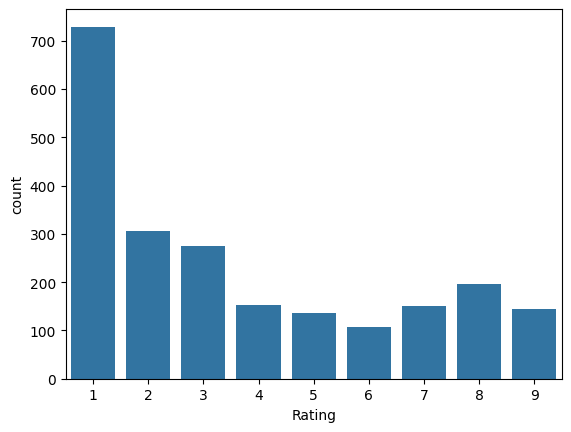

In [37]:
rating_order = ['1','2','3','4','5','6','7','8','9']
sns.countplot(x='Rating', data=df, order=rating_order);

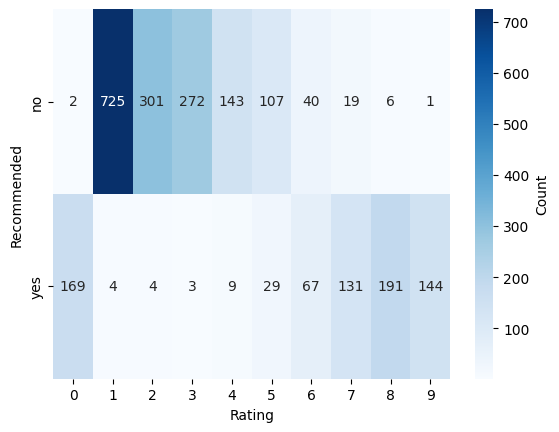

In [38]:
df_cross_seat_rat = pd.crosstab(df['Recommended'], df['Rating'])
sns.heatmap(df_cross_seat_rat, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Count'});

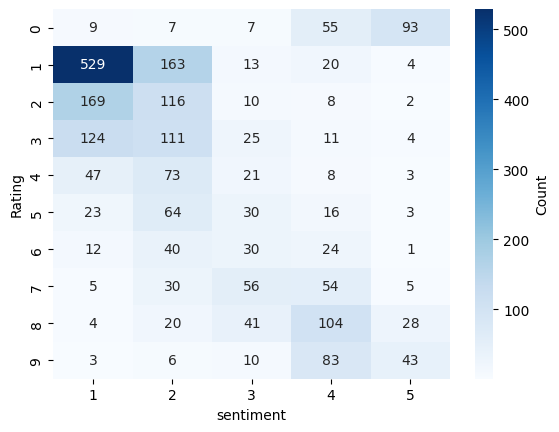

In [39]:
df_cross_rat_cat = pd.crosstab(df['Rating'], df['sentiment'])
sns.heatmap(df_cross_rat_cat, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Count'});

In [40]:
df_cross_seat_rat

Rating,0,1,2,3,4,5,6,7,8,9
Recommended,,,,,,,,,,
no,2,725,301,272,143,107,40,19,6,1
yes,169,4,4,3,9,29,67,131,191,144


Using the pretrained huggingface model to derive the perception of customers towards a product or service and comparing its results to the ratings given by customers as well as their willingness to recommend or not to, gives a brief insight into customers' level of satisfaction. This model generates 5 categoeries, very negative, negative, neutral, positive, to very positive.

Based on the sentiment analysis, backed up by the pattern seen in the rating and recommendation variables while considering the different customer class, it is apparent that a significant number expressed their dissatifaction and displeasure towards the services by the low to average ratings and lack of will power to recommend. Noting that the large chunk stems from the Economy class. Although First class appear to have a nearly normal distribution, with regards to its sentiment distribution and recommendation, it still potrays, that services could be improved on not just in this class but across all classes.